In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from collections import OrderedDict

sns.set()
sns.set_palette(sns.color_palette('Set2', 12))
T = True
F = False

def cols_mapper(x):
    return x.split('-')[-1]#+'({})'.format(x.split('-')[3]) if list(x).count('-') > 3 else x

topn_cols = lambda df, n: df[df.columns[df.sum().isin(df.sum().nlargest(n=n))]]

feast = dfs['feast'].iloc[2:3, :]

st = dfs['sourcetracker'].iloc[2:3, :]

feast = topn_cols(feast[ sorted(feast.columns) ], n=5)
others = feast.apply(lambda x: 1 - x.sum(), axis=1).round(2).tolist()
feast.loc[:, 'Others'] = others
feast = feast.rename(columns=cols_mapper)
st = topn_cols(st[ sorted(st.columns) ], n=5)
others = st.apply(lambda x: 1 - x.sum(), axis=1).round(2).tolist()
st.loc[:, 'Others'] = others
st = st.rename(columns=cols_mapper)

feast

st

fig, (ax1, ax2) = plt.subplots(2, 1, dpi=120, figsize=(4, 6))
feast.T.plot(kind='pie', legend=F, subplots=True, ax=ax1, fontsize=6); ax1.set(xlabel="", ylabel="")
st.T.plot(kind='pie', legend=F, subplots=True, ax=ax2, fontsize=6); ax2.set(xlabel="", ylabel="")
#plt.tight_layout()


fig, (ax1, ax2) = plt.subplots(2, 1, dpi=120, figsize=(3, 6))
feast.T.plot(kind='pie', legend=F, subplots=True, ax=ax1, fontsize=6, labeldistance=None); ax1.set(xlabel="", ylabel="")
st.T.plot(kind='pie', legend=F, subplots=True, ax=ax2, fontsize=6, labeldistance=None); ax2.set(xlabel="", ylabel="")


plt.savefig('sourcetracker_feast_mouth1.svg')

- Problems to be solved: add additional notation for repeated biomes

In [99]:
onn_postproc = lambda x: pd.Series( (x / x.sum()).tolist() + [0] if x.sum() >= 1 else x.tolist() + [1-x.sum()], 
                                   index=x.index.to_list()+['Unknown'])

f= 'data/ONN/HumanSourceTracking.by-ONN.xlsx'
dfs = {sheet: pd.read_excel(f, sheet_name=sheet, index_col=0).apply(onn_postproc, axis=1)
       for sheet in ['layer2', 'layer3', 'layer4', 'layer5', 'layer6']}
f= 'data/FEAST/HumanSourceTracking.by-FEAST.xlsx'
dfs['feast'] = pd.read_excel(f, sheet_name='plot', index_col=0)
f = 'data/SourceTracker/HumanSourceTracking.by-SourceTracker.xlsx'
dfs['sourcetracker'] = pd.read_excel(f, sheet_name='plot', index_col=0)

In [102]:
def cols_mapper(x):
    x = x.replace('Host-associated', 'Host_associated')
    if x.endswith('Fecal') or x.endswith('Digestive_system') or x.endswith('Saliva') or x.endswith('Oral') or x.endswith('Pharynx')\
        or x.endswith('Large_intestine') or x.endswith('Skin') or x.endswith('Respiratory_system'):
        return x.split('-')[-1][0:]+(' ({})'.format('H*' if x.split('-')[2] == 'Human' else 'M**'))
        '''elif x.endswith('Dissolved_organics_(aerobic)'):
            return ':'.join(x.split('-')[-1:])+('({})'.format(x.split('-')[-3]))'''
    else:
        return ':'.join(x.split('-')[-1:])

topn_cols = lambda df, n: df[df.columns[df.sum().isin(df.sum().nlargest(n=n))]]
keep = lambda x: x

for name in dfs.keys():
    dfs[name] = topn_cols(dfs[name][ sorted(dfs[name].columns) ], n=5)
    others = dfs[name].apply(lambda x: 1 - x.sum(), axis=1).round(2).tolist()
    dfs[name].loc[:, 'Others'] = others
    dfs[name] = dfs[name].rename(columns=cols_mapper)
    index = dfs[name].index.to_series().apply(lambda x: ' '.join(x.split()[3:-1])) 
    dfs[name].index = index + pd.Series(['_1', '_2'] * 5, index=index.index)

In [103]:
dfs['feast']

,Unknown,Large_intestine (H*),Pharynx (H*),Skin (H*),Plants,Others
Forehead_1,0.148284,0.046187,1.289369e-01,8.799799e-02,8.757802e-02,0.50
Forehead_2,0.040707,0.015905,1.148291e-01,3.478712e-01,1.569149e-01,0.32
Mouth_1,0.297411,0.019292,2.294234e-01,1.228096e-01,0.000000e+00,0.33
Mouth_2,0.399414,0.123280,1.493300e-36,8.175743e-31,1.117433e-40,0.48
Stool_1,0.171686,0.354132,1.145037e-14,2.407106e-02,3.352278e-05,0.45
Stool_2,0.471558,0.374332,3.642013e-12,0.000000e+00,5.614154e-02,0.10
Left Hand_1,0.094746,0.028605,1.449721e-01,1.192864e-01,3.940791e-02,0.57
Left Hand_2,0.208702,0.275387,1.960542e-02,3.866458e-02,9.348387e-02,0.36
Right Hand_1,0.150886,0.066623,1.774245e-01,1.994887e-01,1.535878e-01,0.25
Right Hand_2,0.108151,0.006221,9.988074e-02,1.144444e-01,3.423774e-01,0.33


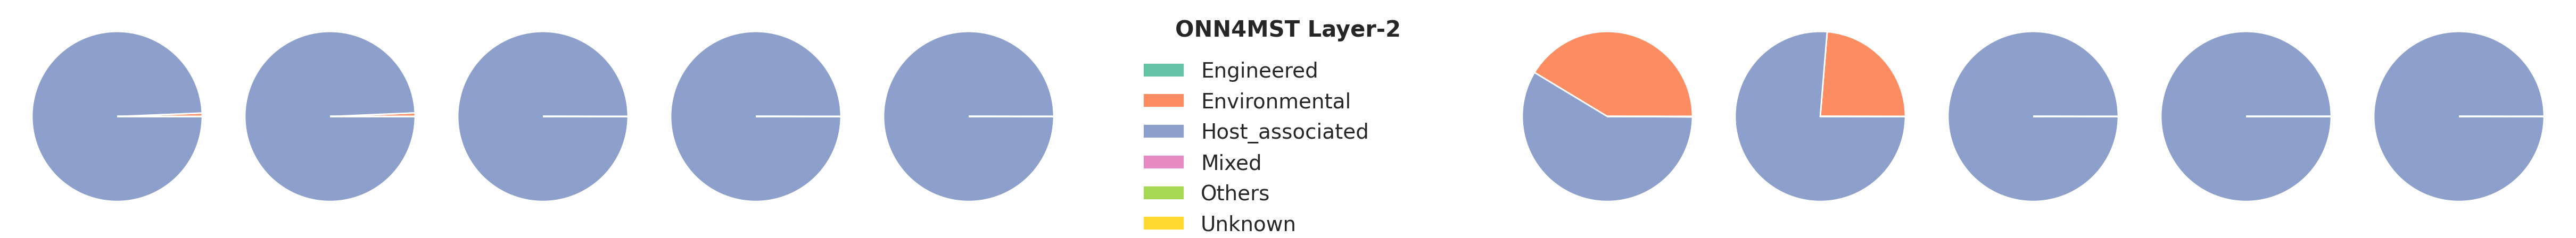

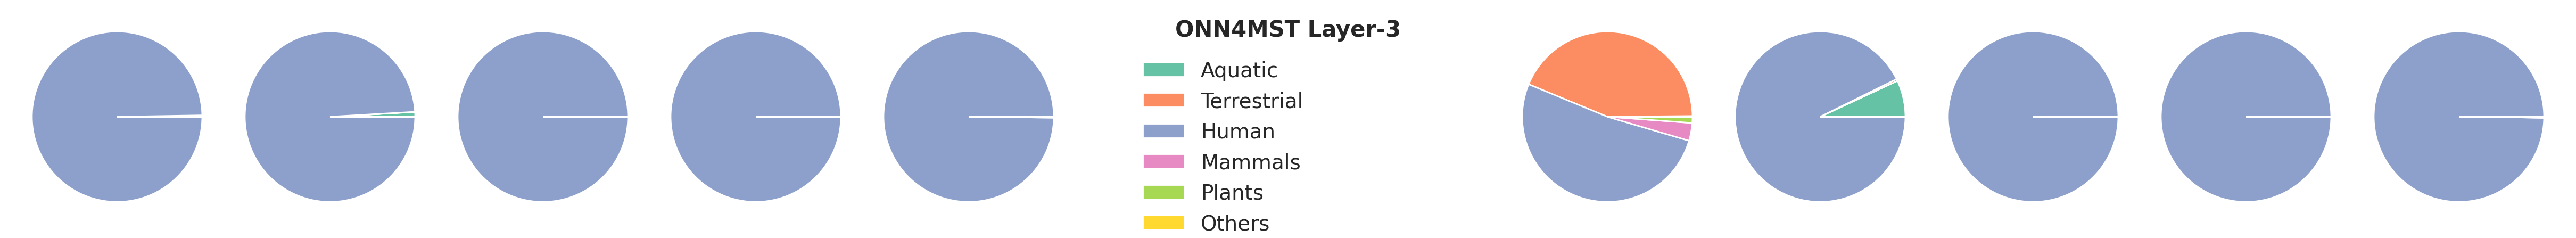

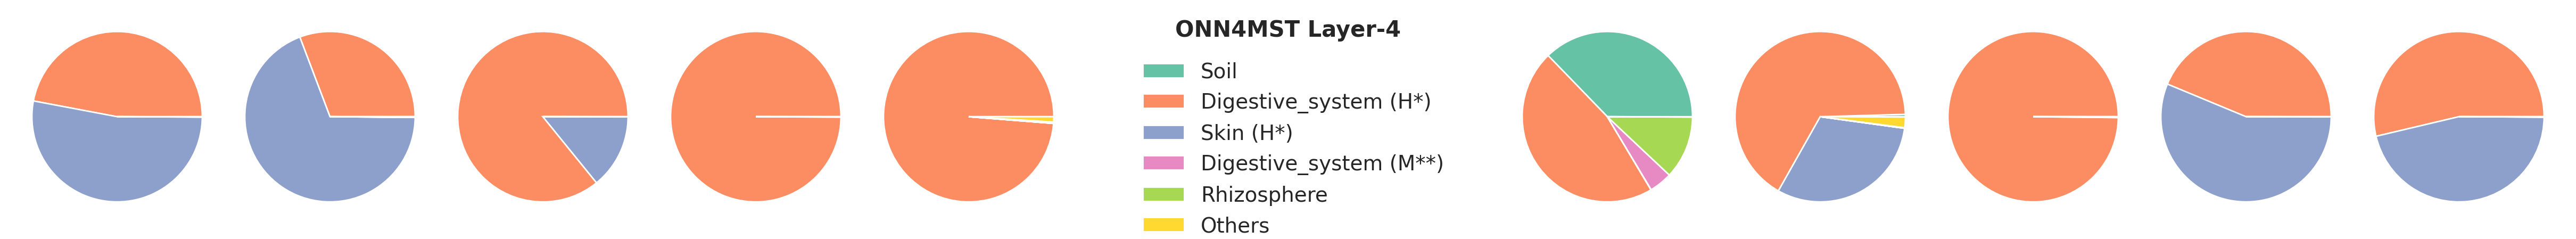

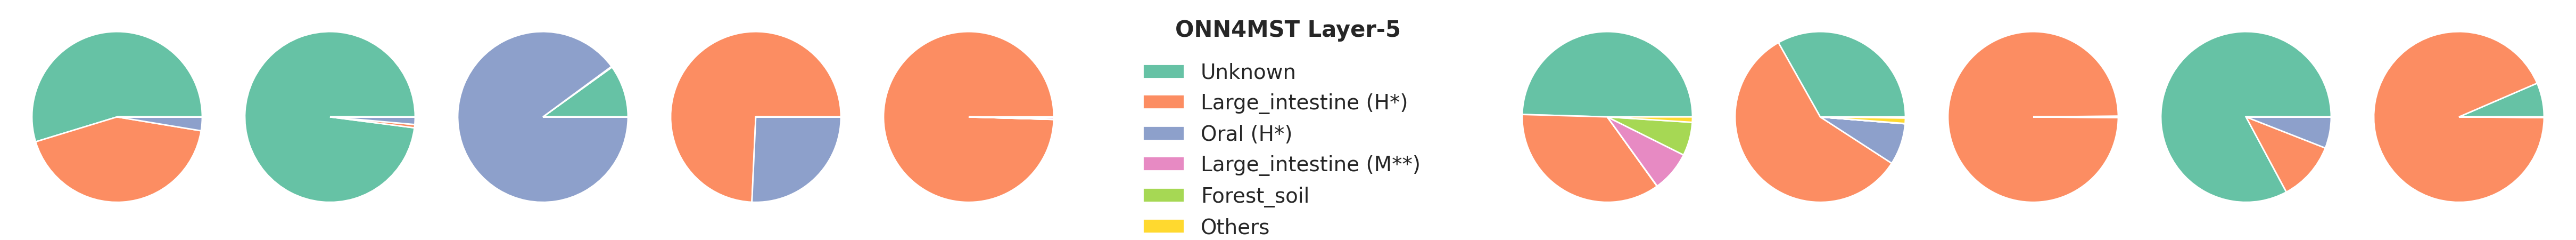

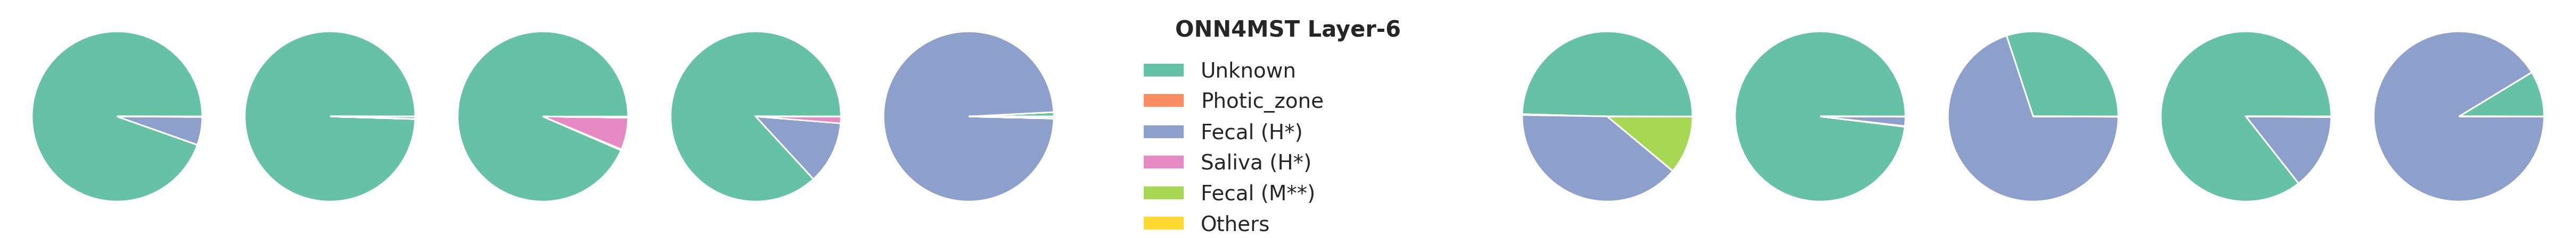

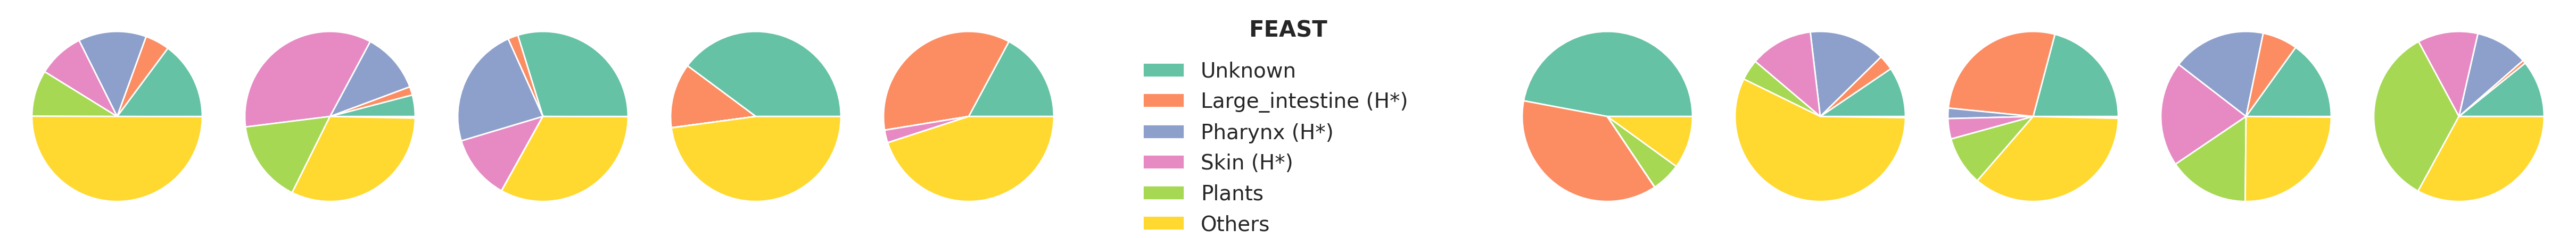

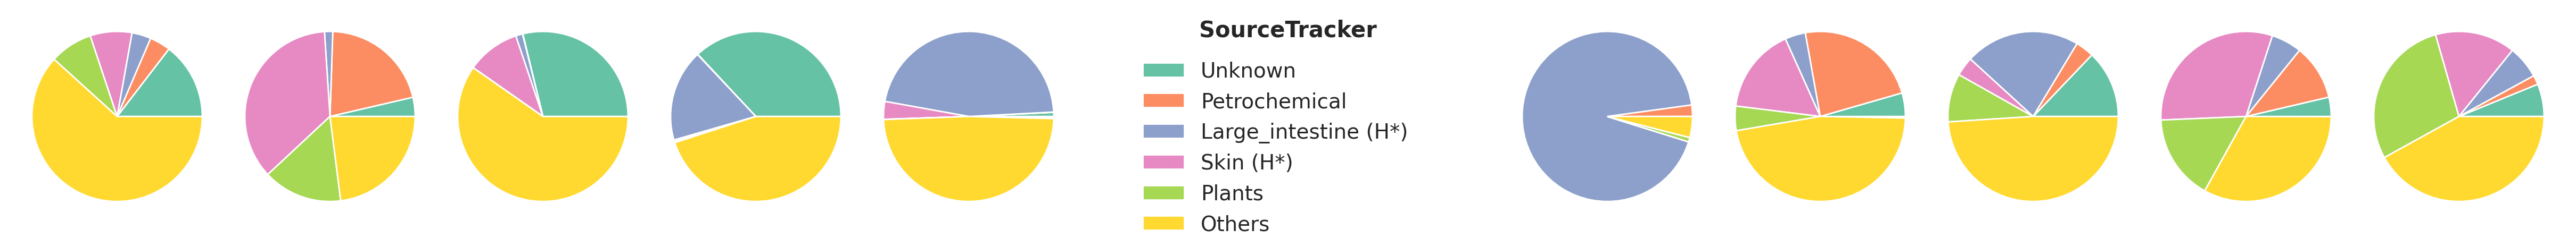

In [126]:
titles = ['ONN4MST Layer-2', 'ONN4MST Layer-3', 'ONN4MST Layer-4', 'ONN4MST Layer-5', 'ONN4MST Layer-6', 'FEAST', 'SourceTracker', ]
titles = OrderedDict( zip( ['layer2', 'layer3', 'layer4', 'layer5', 'layer6', 'feast', 'sourcetracker'], titles) )
for name in dfs.keys():
    fig, axes = plt.subplots(1, 12, dpi=200, figsize=(24, 2))
    plt.axis('off')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0, wspace=0)
    plt.margins(0,0)
    #plt.tight_layout()
    axes = axes.flatten()
    handles, labels = ([], [])
    for i in range(len(axes)):
        axes[i].set_axis_off(); axes[i].set_xticks([]); axes[i].set_yticks([])
        #axes[i].set_position([0, 0, 1, 1], which='both')
        if i < 5:
            df = dfs[name].iloc[i, :].T + 1e-4
            df.plot(kind='pie', legend=F, ax=axes[i], labeldistance=None)
            #if titles[name] == 'ONN4MST Layer-2': axes[i].set_title(df.name, fontsize=14, y=0.92)
            #ax.pie(df, autopct="%.1f%%", pctdistance=0.9)
        elif i == 5 or i ==6:
            axes[i].grid(b=None); axes[i].set_xticks([]); axes[i].set_yticks([]); axes[i].set_facecolor('white')
        else:
            df = dfs[name].iloc[i-2, :].T + 1e-4
            df.plot(kind='pie', legend=F, ax=axes[i], labeldistance=None)
            #if titles[name] == 'ONN4MST Layer-2': axes[i].set_title(df.name, fontsize=14, y=0.92)
        axes[i].set(xlabel="", ylabel="")
        #ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fontsize=6.2)
        handles_labels = axes[i].get_legend_handles_labels()
        handles+= handles_labels[0] 
        labels+= handles_labels[1]
        
    fig.legend(OrderedDict.fromkeys(handles).keys(), OrderedDict.fromkeys(labels).keys(), loc='upper left', ncol=1, fontsize=14, 
               bbox_to_anchor=(0.44, 0.92), facecolor='white', edgecolor='white', framealpha=0)
    fig.suptitle(titles[name], fontsize=15, fontweight='bold', y=0.96)
    plt.savefig(name+'.pdf')
    plt.savefig(name+'.svg')